In [1]:
from google.colab import files
import os

# upload kaggle.json
files.upload()

# create directory and move token
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API token has been set up successfully!")

Saving kaggle.json to kaggle.json
Kaggle API token has been set up successfully!


In [2]:
# download dataset from Kaggle
!kaggle datasets download -d olistbr/brazilian-ecommerce

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
  0% 0.00/42.6M [00:00<?, ?B/s]
100% 42.6M/42.6M [00:00<00:00, 553MB/s]


In [3]:
# unzip file
!unzip brazilian-ecommerce.zip

Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


# load data

In [4]:
import pandas as pd
customers_df = pd.read_csv('olist_customers_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')

In [5]:
# merge data frame
merge_df = pd.merge(
    orders_df,
    order_items_df,
    on = 'order_id',
    how = 'inner'
)
master_df = pd.merge(
    merge_df,
    customers_df,
    on = 'customer_id',
    how = 'inner'
)

In [6]:
print("Master DataFrame Info:")
master_df.info()

print("\n\nMaster DataFrame Head:")
display(master_df.head())

Master DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price  

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


# Data wrangling

In [7]:
cleaned_df = master_df.copy()
cleaned_df['order_purchase_timestamp'] = pd.to_datetime(cleaned_df['order_purchase_timestamp'])

In [8]:
print(cleaned_df.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64


In [9]:
# Because we need to have all of customer_id
cleaned_df.dropna(subset=['customer_id', 'order_purchase_timestamp'], inplace=True)

In [10]:
#columns we want to keep
keep_columns = [
                'customer_unique_id',
                'customer_id',
                'order_id',
                'order_purchase_timestamp',
                'price',
                'freight_value']

cleaned_df = cleaned_df[keep_columns]

In [11]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_unique_id        112650 non-null  object        
 1   customer_id               112650 non-null  object        
 2   order_id                  112650 non-null  object        
 3   order_purchase_timestamp  112650 non-null  datetime64[ns]
 4   price                     112650 non-null  float64       
 5   freight_value             112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 5.2+ MB


In [12]:
cleaned_df.head()

,customer_unique_id,customer_id,order_id,order_purchase_timestamp,price,freight_value
0,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99,8.72
1,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70,22.76
2,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90,19.22
3,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00,27.20
4,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90,8.72


# Feature engineering

In [13]:
cleaned_df['total_price'] = cleaned_df['price']+cleaned_df['freight_value']
# Assume we anlyze data after last day in dataset
snapshot_date = cleaned_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm_df = cleaned_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days, # calculate Recency
    'order_id': 'nunique',                                               # calculate Frequency
    'total_price': 'sum'                                                 # calculate Monetary
})

#rename columns
rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'total_price': 'Monetary'
}, inplace=True)

In [14]:
# Check values
rfm_df['Frequency'].value_counts()

,count
Frequency,
1,92507
2,2673
3,192
4,29
5,9
6,5
7,3
9,1
16,1


In [15]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,95420.000000,95420.000000,95420.000000
mean,243.600377,1.034018,166.040172
std,153.160320,0.211234,228.320333
min,1.000000,1.000000,9.590000
25%,119.000000,1.000000,63.100000
50%,224.000000,1.000000,107.940000
75%,353.000000,1.000000,183.220000
max,729.000000,16.000000,13664.080000


In [16]:
# Create binning for 5 bins
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'].rank(method = 'first'),
                                  5, labels = [1, 2, 3, 4, 5])
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], 5, labels = [5, 4, 3, 2, 1])
rfm_df.head(5)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,1,2
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,5
0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,4
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,5
0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,2


In [17]:
# RFM Score
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str)
rfm_df.head(5)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,1,2,41
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,5,41
0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,4,11
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,5,21
0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,2,21


In [18]:
# Convert RFM Score to segment label
RFMLabel = {
    r'55': "Champion",
    r'[3-5][4-5]': "Loyal",
    r'[4-5][2-3]': "Promising",
    r'51': "New Customers",
    r'41': "Warm Leads",
    r'31': "Cold Leads",
    r'[2-3][2-3]': "Need Attention",
    r'[1-2][5]': "Shouldn't Lost",
    r'[1-2][3-4]': 'Sleepers',
    r'[1-2][1-2]': "Lost"
}

rfm_df['Segment'] = rfm_df['RFMScore'].replace(RFMLabel, regex = True)

In [19]:
rfm_df

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,1,2,41,Warm Leads
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,5,41,Warm Leads
0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,4,11,Lost
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,5,21,Lost
0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,2,21,Lost
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452,1,2067.42,1,5,1,15,Shouldn't Lost
fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,3,5,4,35,Loyal
ffff371b4d645b6ecea244b27531430a,573,1,112.46,1,5,3,15,Shouldn't Lost


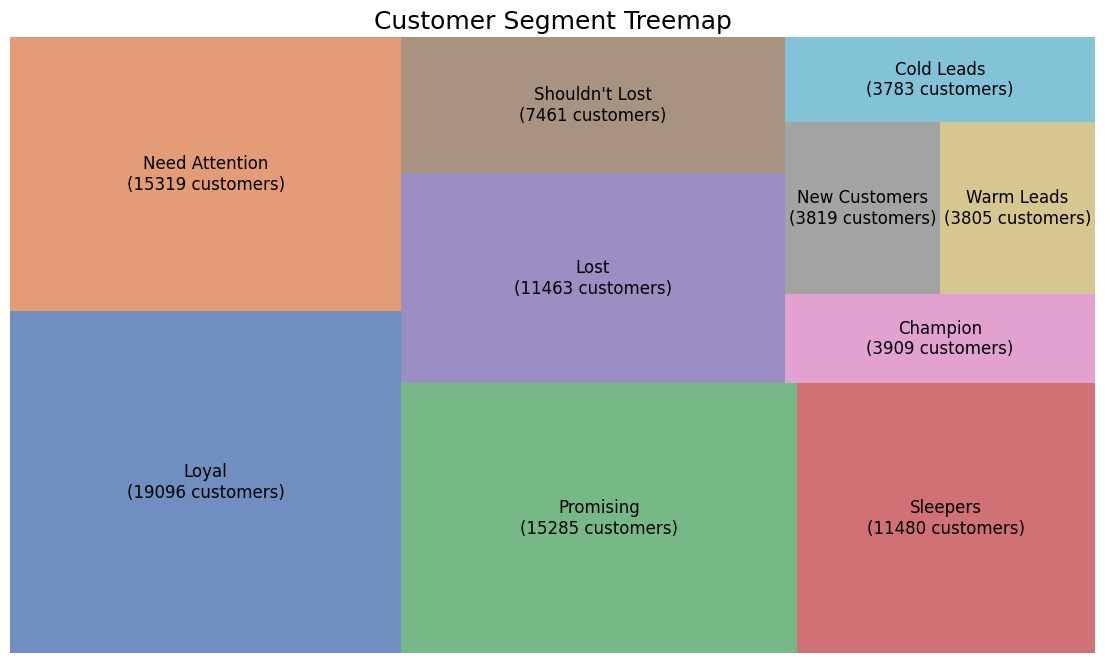

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

segment_counts = rfm_df['Segment'].value_counts()
sizes = segment_counts.values
labels = [f'{label}\n({size} customers)' for label, size in segment_counts.items()]

plt.figure(figsize=(14, 8))

#Treemap
squarify.plot(sizes=sizes,
              label=labels,
              color=sns.color_palette("deep", len(sizes)),
              alpha=0.8,
              text_kwargs={'fontsize':12}
             )

plt.title('Customer Segment Treemap', fontsize=18)
plt.axis('off')
plt.show()

# Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

prediction_period_days = 90
#We will use the data before last 90 days
train_df_end_date = cleaned_df['order_purchase_timestamp'].max() - pd.Timedelta(days=prediction_period_days)
rfm_train_df = cleaned_df[cleaned_df['order_purchase_timestamp'] <= train_df_end_date]

#Recalculate rfm
snapshot_date_train = rfm_train_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
clv_rfm_df = rfm_train_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date_train - x.max()).days,
    'order_id': 'nunique',
    'total_price': 'sum'
})
clv_rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'total_price': 'Monetary'
}, inplace=True)

#Target
target_df = cleaned_df[cleaned_df['order_purchase_timestamp'] > train_df_end_date]
clv_target_df = target_df.groupby('customer_unique_id')['total_price'].sum().reset_index()
clv_target_df.rename(columns={'total_price': 'CLV_90_Days'}, inplace=True)

#Combine table cllv_rfm
final_clv_df = pd.merge(clv_rfm_df, clv_target_df, on='customer_unique_id', how='left')
final_clv_df['CLV_90_Days'].fillna(0, inplace=True)
#Split data
X = final_clv_df[['Recency', 'Frequency', 'Monetary']] # Features
y = final_clv_df['CLV_90_Days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-3699668829.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_clv_df['CLV_90_Days'].fillna(0, inplace=True)


In [24]:
clv_rfm_df

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,26,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,29,1,27.19
0000f46a3911fa3c0805444483337064,452,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,236,1,43.62
0004aac84e0df4da2b147fca70cf8255,203,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,362,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,177,1,84.58
ffff371b4d645b6ecea244b27531430a,483,1,112.46


In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                           n_estimators=100,
                           learning_rate=0.1,
                           max_depth=5,
                           random_state=42)

xgb_model.fit(X_train, y_train)

#Predict
y_pred = xgb_model.predict(X_test)


#Evaluate error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 1.60
Root Mean Squared Error (RMSE): 14.50


In [26]:
# --- Checking Overfitting ---

y_pred_train = xgb_model.predict(X_train)

# Calculate Error from Training set
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# --- Compare error to check Overfitting ---
print("\n--- Compare error to check Overfitting ---")
print(f"Training MAE: {mae_train:.2f}")
print(f"Testing MAE:  1.60 ")
print("-" * 40)
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE:  14.50 ")


--- Compare error to check Overfitting ---
Training MAE: 1.69
Testing MAE:  1.60 
----------------------------------------
Training RMSE: 16.42
Testing RMSE:  14.50 


# Model Interpret

--- Feature Importance Scores ---


,Feature,Importance
2,Monetary,0.617692
0,Recency,0.274300
1,Frequency,0.108008


/tmp/ipython-input-4072562905.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


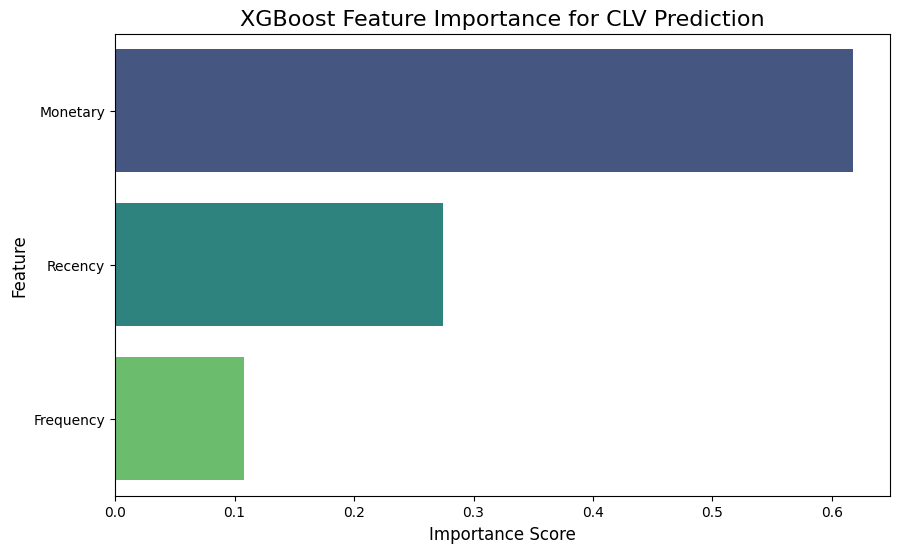

In [27]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns
#Create features importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
#Sorting feature
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("--- Feature Importance Scores ---")
display(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

plt.title('XGBoost Feature Importance for CLV Prediction', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [28]:
#rfm_df.to_csv('rfm_analysis_results.csv')
#from google.colab import files
#files.download('rfm_analysis_results.csv')